In [1]:
import sklearn
import numpy as np
import os, sys

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

In [2]:
folders = [
    'dataset_MonteCarlo_500.000/',
    'dataset_MonteCarlo_ranges_500.000/',
    'dataset_MonteCarlo_ranges_zeros_500.000/',
    'dataset_MonteCarlo_zeros_500.000/',
    'dataset_MonteCarlo_cov_500.000/',
]

In [3]:
list_df = []
files = ['results-4.csv', 'results-20.csv', 'results-100.csv', 'results.csv']
for file in files:
    list_aux = []
    for folder in folders:
        list_aux.append(pd.read_csv('../../datasets/'+folder+file))
    list_df.append(list_aux)
df_orig = pd.read_csv('../../datasets/icferst_run_orig/time_series.csv')

In [4]:
for j in range(len(files)):
    for i in range(len(list_df)):
        list_df[j][i] = list_df[j][i][['Time','avg(Time)','avg(Species_Ca+2)','avg(Species_Cl-)','avg(Species_K+)','avg(Species_NO3-)','avg(Species_Na+)']]
df_orig = df_orig[['Time','avg(Time)','avg(Species_Ca+2)','avg(Species_Cl-)','avg(Species_K+)','avg(Species_NO3-)','avg(Species_Na+)']]

In [5]:
df_orig

,Time,avg(Time),avg(Species_Ca+2),avg(Species_Cl-),avg(Species_K+),avg(Species_NO3-),avg(Species_Na+)
0,0,0,0.0000,0.000000e+00,2.000000e-04,0.001200,0.001000
1,1,720,0.0000,0.000000e+00,1.994000e-04,0.001196,0.000997
2,2,1440,0.0000,0.000000e+00,1.994000e-04,0.001196,0.000997
3,3,2160,0.0000,0.000000e+00,1.994000e-04,0.001196,0.000997
4,4,2880,0.0000,1.267540e-23,1.994000e-04,0.001196,0.000997
...,...,...,...,...,...,...,...
117,117,84240,0.0006,1.199990e-03,1.542880e-08,0.000000,0.000000
118,118,84960,0.0006,1.199990e-03,1.227440e-08,0.000000,0.000000
119,119,85680,0.0006,1.199990e-03,9.763230e-09,0.000000,0.000000
120,120,86400,0.0006,1.199990e-03,7.771020e-09,0.000000,0.000000


<AxesSubplot:>

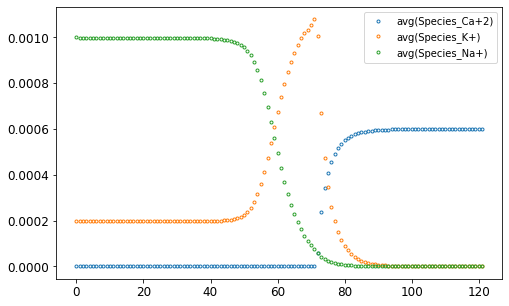

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
df_orig[['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(linestyle='none', marker='.',markerfacecolor='none',ax=ax)

In [7]:
def crosscorr(datax, datay):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return [datax.corr(datay.shift(lag)) for lag in range(-int(len(datax)/2),int(len(datax)/2))]

In [8]:
x_range = range(-int(len(df_orig['avg(Species_K+)'])/2),int(len(df_orig['avg(Species_K+)'])/2))

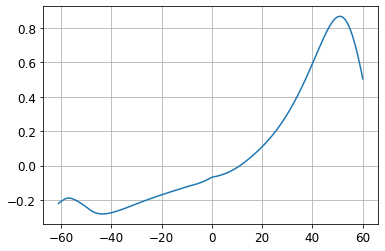

In [9]:
plt.plot(x_range, crosscorr(df_orig['avg(Species_K+)'], list_df[0][1]['avg(Species_K+)']))
plt.grid()

In [58]:
mse_err=[]
mae_err=[]
corr=[]
for j in range(len(files)):
    mse_aux=[]
    mae_aux=[]
    corr_aux=[]
    for i in range(len(folders)):
        diff = list_df[j][i][['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']] - df_orig[['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']]
        mse_aux.append((diff.to_numpy()**2).mean(axis=0))
        mae_aux.append(abs(diff.to_numpy()).mean(axis=0))
        corr_aux.append(np.array([
            max(crosscorr(df_orig['avg(Species_Ca+2)'], list_df[j][i]['avg(Species_Ca+2)'])),
            max(crosscorr(df_orig['avg(Species_K+)'], list_df[j][i]['avg(Species_K+)'])),
            max(crosscorr(df_orig['avg(Species_Na+)'], list_df[j][i]['avg(Species_Na+)'])),
            ]))
    mse_err.append(mse_aux)
    mae_err.append(mae_aux)
    corr.append(corr_aux)
mse_err=np.array(mse_err)
mae_err=np.array(mae_err)
corr=np.array(corr)
# for i in range(len(list_df)):
#     print(f'{mse_err[i]*1e6}', f'{np.mean(mse_err[i]*1e6):.3f}',folders[i])
# print()
# for i in range(len(list_df)):
#     print(f'{mae_err[i]*1e3}', f'{np.mean(mae_err[i]*1e3):.3f}', folders[i])
# print()
# for i in range(len(list_df)):
#     print(f'{corr[i]}', f'{np.mean(corr[i]):.3f}',folders[i])          

In [59]:
mse_err = np.sqrt(mse_err)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Lower is better:


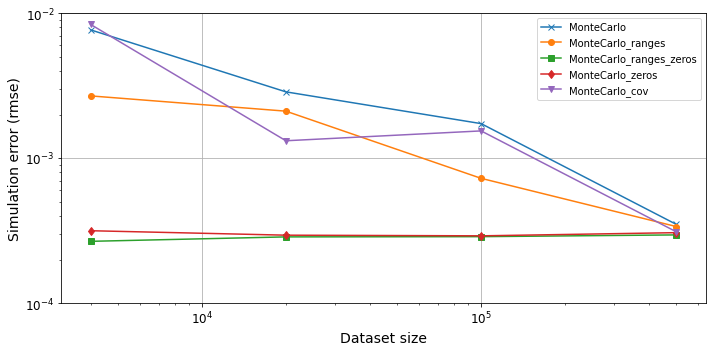

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
for y,m in zip(mse_err.mean(axis=-1).T,'xosdv'):
    ax.plot([4000,20000,100000,500000],y,m+'-')
ax.set_yscale('log')
ax.set_ylim([1e-4,1e-2])
ax.set_xscale('log')
ax.set_ylabel('Simulation error (rmse)');
ax.set_xlabel('Dataset size');
plt.legend([f[8:-9] for f in folders])
plt.grid()
print('Lower is better:')
plt.tight_layout()
plt.savefig('rmse_dataset.eps')

Lower is better:


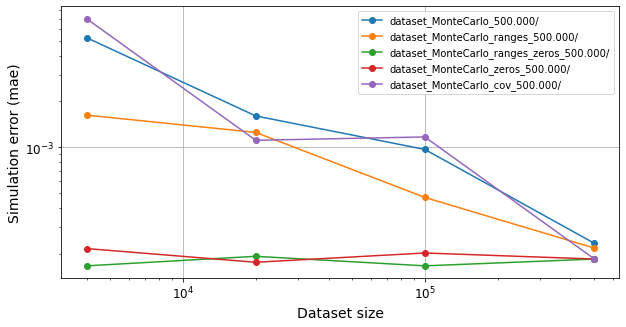

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot([4000,20000,100000,500000],mae_err.mean(axis=-1),'o-')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Simulation error (mae)');
ax.set_xlabel('Dataset size');
plt.legend(folders)
plt.grid()
print('Lower is better:')

Higher is better:


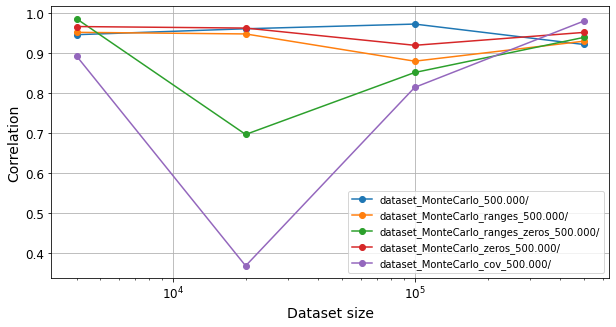

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot([4000,20000,100000,500000],corr.mean(axis=-1),'o-')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Correlation');
ax.set_xlabel('Dataset size');
plt.legend(folders)
plt.grid()
print('Higher is better:')